# Citibike Exploration
## by Trupti Patil

## Preliminary Wrangling

#### CitiBike data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sb
import datetime
import calendar 

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

#### This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [2]:
df = pd.read_csv("fordgobiketripdata.csv")


In [3]:
# high-level overview of data shape and composition
print(df.shape)
print(df.dtypes)
print(df.head(10))

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object
   duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:2

### What is the structure of your dataset?
#### There are 183412 trip entries for month of Feb 2019
#### There are 2 user types subscriber,customer 
#### There are 3 main genders types Male,Females,Other
#### birth year and gender are missing in some records
#### There are start station and end station ,start location and end location for each trip for given bike id

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [6]:
df.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [7]:
df.start_station_id.value_counts()

58.0     3904
67.0     3544
81.0     3052
21.0     2895
3.0      2760
         ... 
301.0       9
51.0        7
300.0       4
224.0       4
344.0       2
Name: start_station_id, Length: 329, dtype: int64

In [8]:
df.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [9]:
df.member_gender.value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [10]:
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [11]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [12]:
df.start_time.max()

'2019-02-28 23:59:18.5480'

In [13]:
df.start_time.min()

'2019-02-01 00:00:20.6360'

In [14]:
df.bike_share_for_all_trip.unique()

array(['No', 'Yes'], dtype=object)

#### Quality Issues spotted in the fordgobike.csv
#### 1. member_birth_year needs to be int instead of float
#### 2. Nulls in member_birth_year,member_gender,end_station_id , end_station_name,start_station_id,start_station_name
#### 3. start_station_id and end_station_id needs to be int instead of float
#### 4. bike_share_for_all_trip can be boolean
#### 5. start_time , end_time need to be timestamp

In [15]:
df_clean = df.copy()

In [16]:
df_clean['member_birth_year'] = df_clean['member_birth_year'].fillna(0)
df_clean['member_gender'] = df_clean['member_gender'].fillna(0)
df_clean['end_station_id'] = df_clean['end_station_id'].fillna(0)
df_clean['end_station_name'] = df_clean['end_station_name'].fillna(0)
df_clean['start_station_id'] = df_clean['start_station_id'].fillna(0)
df_clean['start_station_name'] = df_clean['start_station_name'].fillna(0)
df_clean.loc[(df_clean.member_gender == '0'),'member_gender']='Other'

In [17]:
df_clean['member_birth_year'] = df_clean['member_birth_year'].astype(int)
df_clean['start_station_id'] = df_clean['start_station_id'].astype(int)
df_clean['send_station_id'] = df_clean['end_station_id'].astype(int)
df_clean['bike_share_for_all_trip'] = df_clean['bike_share_for_all_trip'].astype(bool)

In [18]:
df_clean['start_time'] = pd.to_datetime(df_clean.start_time)
df_clean['end_time'] = pd.to_datetime(df_clean.end_time)


##### Extract start day of the week and end day of the week

In [19]:
df_clean['start_time_day'] = df_clean['start_time'].dt.strftime('%a')
df_clean['end_time_day'] = df_clean['end_time'].dt.strftime('%a')

In [20]:
df_clean['end_dow']= df_clean['end_time'].dt.dayofweek
df_clean['start_dow']= df_clean['start_time'].dt.dayofweek

#### Convert seconds to minutes

In [21]:
df_clean['duration_min'] = df_clean['duration_sec']/60
df_clean['duration_min'] = df_clean['duration_min'].astype(int)


#### Extract start and end hour

In [22]:
df_clean['start_Hour']= pd.DatetimeIndex(df_clean['start_time']).hour
df_clean['end_Hour']= pd.DatetimeIndex(df_clean['end_time']).hour

In [23]:
df_clean.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,send_station_id,end_dow,start_dow,duration_min,start_Hour,end_Hour
count,183412.000000,183412.000000,183412.000000,183412.000000,183412.000000,183412.000000,183412.000000,183412.000000,183412.000000,183412.000000,183412.000000,183412.000000,183412.000000,183412.000000,183412.000000
mean,726.078435,138.441569,37.771223,-122.352664,136.102780,37.771427,-122.352250,4472.906375,1895.366132,136.102780,2.632129,2.632178,11.609393,13.458421,13.614769
std,1794.389780,111.811012,0.099581,0.117097,111.544544,0.099490,0.116673,1664.383394,411.850439,111.544544,1.814946,1.814786,29.908067,4.724978,4.739638
min,61.000000,0.000000,37.317298,-122.453704,0.000000,37.317298,-122.453704,11.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1979.000000,44.000000,1.000000,1.000000,5.000000,9.000000,9.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000,100.000000,3.000000,3.000000,8.000000,14.000000,14.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000,235.000000,4.000000,4.000000,13.000000,17.000000,18.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,398.000000,6.000000,6.000000,1424.000000,23.000000,23.000000


In [24]:
# drop id,bike_share_for_all_trip columns  as it bears no significance to the analysis

df_clean.drop(['bike_share_for_all_trip','bike_id','start_station_id','end_station_id','send_station_id'], axis=1,inplace=True)

In [25]:
df_clean.to_csv('fordgobiketripdata_v1.csv', index=False)

In [26]:
df_clean = pd.read_csv('fordgobiketripdata_v1.csv')

In [27]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_name       183412 non-null  object 
 4   start_station_latitude   183412 non-null  float64
 5   start_station_longitude  183412 non-null  float64
 6   end_station_name         183412 non-null  object 
 7   end_station_latitude     183412 non-null  float64
 8   end_station_longitude    183412 non-null  float64
 9   user_type                183412 non-null  object 
 10  member_birth_year        183412 non-null  int64  
 11  member_gender            183412 non-null  object 
 12  start_time_day           183412 non-null  object 
 13  end_time_day             183412 non-null  object 
 14  end_


### What is/are the main feature(s) of interest in your dataset?
 

 #### Trip times
 #### User Types 
 #### Gender distribution
 #### Hour of the day to use of bikes
 #### Day of the week to use bikes
 


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

 #### Most used Start Station & End Station
 ##### Least used Start Station & End Station
 ##### Age distribution of the users
 #### Trip times
 #### Member Types & usage
 #### Gender & usage

## Univariate Exploration


### Analyse distribution of member type

Text(0, 0.5, 'Count')

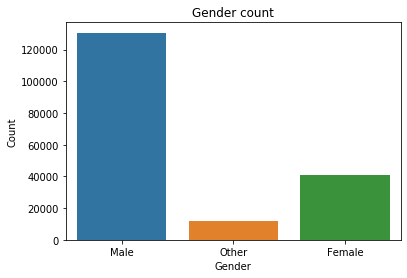

In [28]:
df_clean.loc[(df_clean.member_gender == '0'),'member_gender']='Other'
sb.countplot(data = df_clean,x='member_gender');
plt.title("Gender count")
plt.xlabel("Gender")
plt.ylabel("Count")


#### Not sure what is 0, so convert 0 to other

In [29]:
df_clean.loc[(df_clean.member_gender == '0'),'member_gender']='Other'

In [30]:
df_clean.member_gender.value_counts()

Male      130651
Female     40844
Other      11917
Name: member_gender, dtype: int64

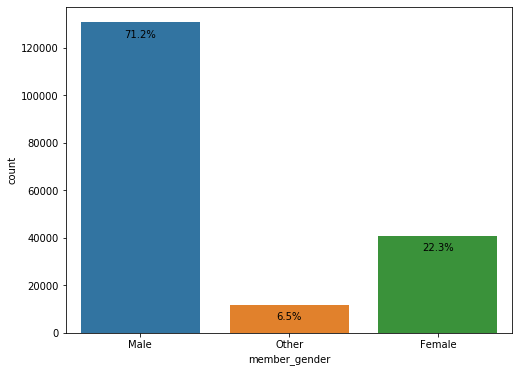

In [31]:
plt.figure(figsize=(8, 6))
ax=sb.countplot(data = df_clean,x='member_gender');
total = len(df_clean['member_gender'])
for p in ax.patches:
        height = p.get_height()
        percentage = '{:.1f}%'.format(100 * height/total)
        x = p.get_x() + p.get_width() 
        y = p.get_y() + p.get_height() 
        ax.annotate(percentage,  (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, -12), textcoords = 'offset points')
                    

#### There are maximun Male users 

### Analyse Frequent start and end stations

#### Top 10 end stations

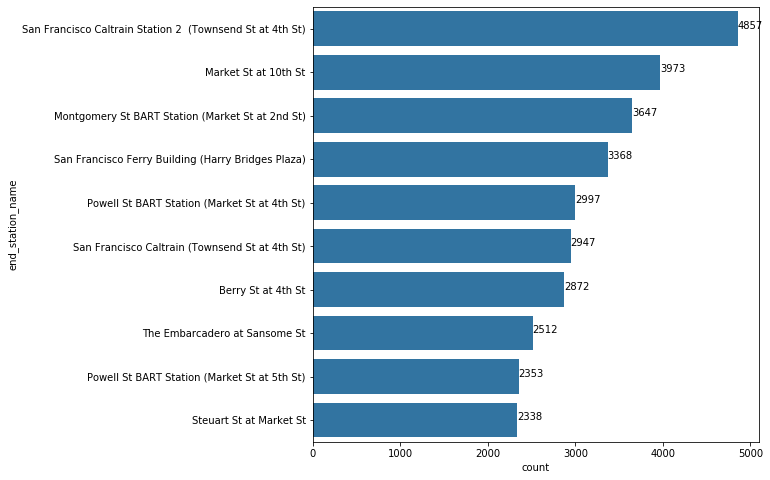

In [32]:
base_color = sb.color_palette()[0]
n = 10
fig, ax = plt.subplots(nrows=1, figsize = [8,8])
gen_order = df_clean['end_station_name'].value_counts().iloc[:n].index
sb.countplot(data=df_clean,y='end_station_name',color=base_color,order=gen_order);
total = len(df_clean['end_station_name'])
for p in ax.patches:
       
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(p.get_width(), (x, y))
        


#### Bottom 10 end station

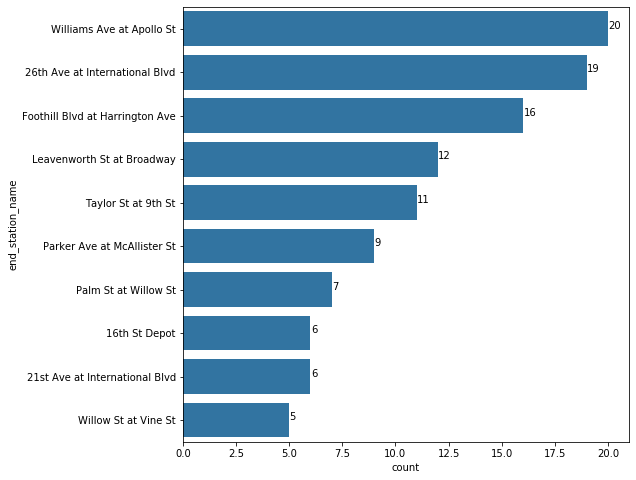

In [33]:
base_color = sb.color_palette()[0]
n = 10
fig, ax = plt.subplots(nrows=1, figsize = [8,8])
gen_order = df_clean['end_station_name'].value_counts().iloc[-n:].index
sb.countplot(data=df_clean,y='end_station_name',color=base_color,order=gen_order);
total = len(df_clean['end_station_name'])
for p in ax.patches:
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(p.get_width(), (x, y))
        


#### Top 10 Start Stations

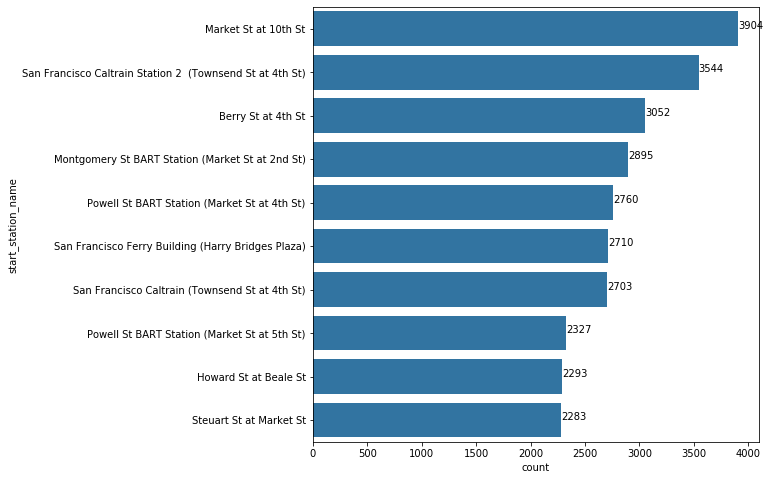

In [34]:
base_color = sb.color_palette()[0]
n = 10
fig, ax = plt.subplots(nrows=1, figsize = [8,8])
gen_order = df_clean['start_station_name'].value_counts().iloc[:n].index
sb.countplot(data=df_clean,y='start_station_name',color=base_color,order=gen_order);
total = len(df_clean['start_station_name'])
for p in ax.patches:
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(p.get_width(), (x, y))

#### Bottom 10 Start Stations

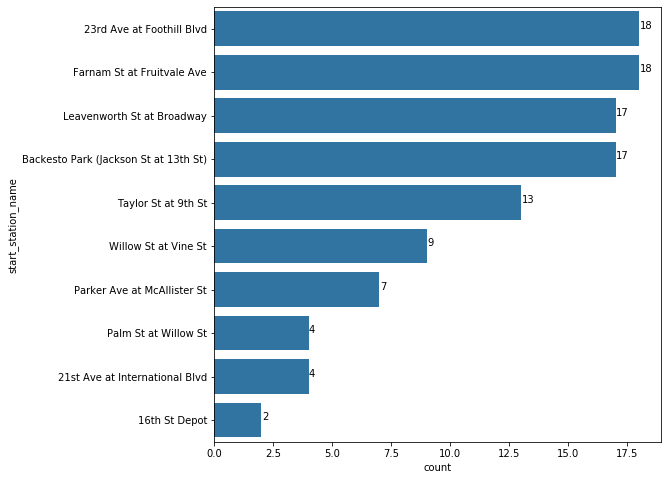

In [35]:
base_color = sb.color_palette()[0]
n = 10
fig, ax = plt.subplots(nrows=1, figsize = [8,8])
gen_order = df_clean['start_station_name'].value_counts().iloc[-n:].index
sb.countplot(data=df_clean,y='start_station_name',color=base_color,order=gen_order);
total = len(df_clean['start_station_name'])
for p in ax.patches:
        
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(p.get_width(), (x, y))
        


### Check distribution of user types

In [36]:
s=df_clean['user_type'].value_counts()
s

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

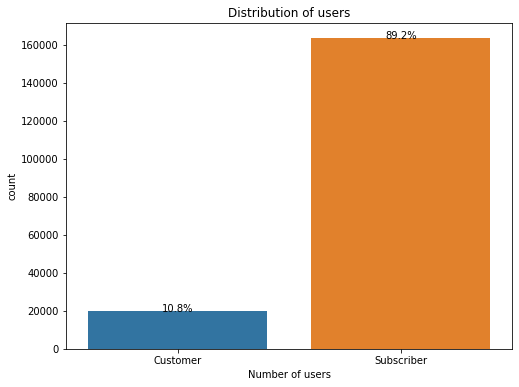

In [37]:
plt.figure(figsize=(8,6))
ax= sb.countplot(data = df_clean,x='user_type')
plt.title('Distribution of users')
plt.xlabel('Number of users')
total = len(df_clean['user_type'])
for p in ax.patches:
        height = p.get_height()
        percentage = '{:.1f}%'.format(100 * height/total)
        ax.text(p.get_x()+p.get_width()/2.,
            height + 4,percentage,ha='center')
        

plt.show()


#### There are more subscriber than customer. Customers are occasional users of the bike while subscribers use the bikes daily 

#### Study of Trip Time using duration_sec
#### Since duration is in seconds it needs to converted to minute

In [38]:
df_clean['duration_min'] = df_clean['duration_sec']/60
df_clean['duration_min'] = df_clean['duration_min'].astype(int)


#### Check the max and min duration

In [39]:
print('max duration:', df_clean['duration_min'].max())
print('min duration:', df_clean['duration_min'].min())
print('mean duration:', df_clean['duration_min'].mean())

max duration: 1424
min duration: 1
mean duration: 11.60939306043225


In [40]:
df_clean['duration_min'].describe()

count    183412.000000
mean         11.609393
std          29.908067
min           1.000000
25%           5.000000
50%           8.000000
75%          13.000000
max        1424.000000
Name: duration_min, dtype: float64

#### Histogram for entire df

Text(0.5, 0, 'duration min')

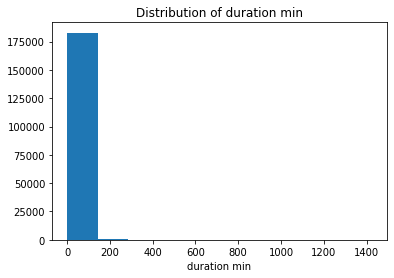

In [41]:
bins = np.arange(0, df_clean['duration_min'].max()+5, 5)
plt.hist(df_clean['duration_min'],bins=10);
plt.title('Distribution of duration min')
plt.xlabel('duration min')
         

#### This plot has one tall column only on one side of the figure
#### So change the bin size

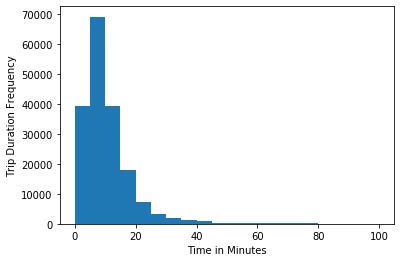

In [42]:
plt.hist(df_clean['duration_min'],range = (0,100),bins=20);         
plt.xlabel('Time in Minutes')
plt.ylabel("Trip Duration Frequency")
plt.show()

#### Peak trip duration is around 10 min

### Scale transformation on trip duration
#### Use log scale on trip duration as data is spread across widely

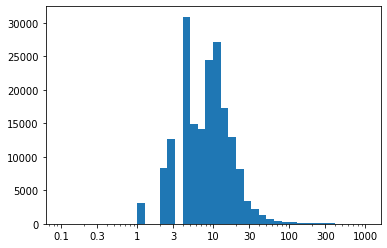

In [43]:
# Get the ticks for bins between [0 - max duration]
bins = 10 ** np.arange(-1, 3+0.1, 0.1)
# Generate the x-ticks you want to apply
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
# Convert ticks into string values, to be displaye dlong the x-axis
labels = ['{}'.format(v) for v in ticks]
plt.hist(data=df_clean, x='duration_min', bins=bins);
plt.xscale('log')
#Apply x-ticks
plt.xticks(ticks, labels);

#### Fluctuation in the the time distribution is clearly seen with log scale

### Find the the trip time distribution for customers and subscribers

##### Customers

In [44]:
cust_duration = df_clean[df_clean['user_type'] == 'Customer'].copy()

In [45]:
cust_duration['duration_min'].describe()

count    19868.000000
mean        23.380763
std         64.358717
min          1.000000
25%          8.000000
50%         13.000000
75%         21.000000
max       1396.000000
Name: duration_min, dtype: float64

#### Normal histogram of customer duration¶


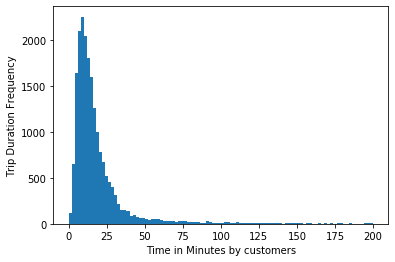

In [46]:
plt.hist(cust_duration['duration_min'],bins=100,range = (0, 200));
plt.xlabel('Time in Minutes by customers')
plt.ylabel("Trip Duration Frequency")
plt.show()

#### Transformed histogram of customer duration

In [47]:
np.log10(cust_duration['duration_min'].describe())

count    4.298154
mean     1.368859
std      1.808607
min      0.000000
25%      0.903090
50%      1.113943
75%      1.322219
max      3.144885
Name: duration_min, dtype: float64

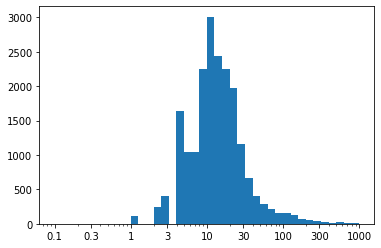

In [48]:
# Get the ticks for bins between [0 - max duration]
bins = 10 ** np.arange(-1, 3+0.1, 0.1)
# Generate the x-ticks you want to apply
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
# Convert ticks into string values, to be displaye dlong the x-axis
labels = ['{}'.format(v) for v in ticks]
plt.hist(data=cust_duration, x='duration_min', bins=bins);
plt.xscale('log')
#Apply x-ticks
plt.xticks(ticks, labels);


#### Fluctuation in the the time distribution is clearly seen with log scale¶

#### Customers trips time is distributed from 1 to 1396, peak usage time is 23 min

#### Subscribers

In [49]:
sub_duration = df_clean[df_clean['user_type'] == 'Subscriber'].copy()
sub_duration['duration_min'].describe()

count    163544.000000
mean         10.179358
std          21.934238
min           1.000000
25%           5.000000
50%           8.000000
75%          12.000000
max        1424.000000
Name: duration_min, dtype: float64

#### Normal Histogram

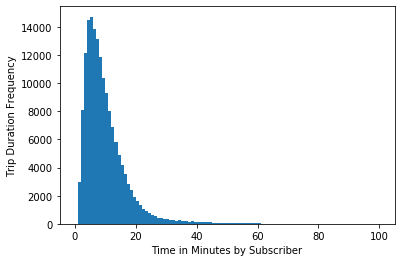

In [50]:
plt.hist(sub_duration['duration_min'],bins=100,range = (0, 100));
plt.xlabel('Time in Minutes by Subscriber')
plt.ylabel("Trip Duration Frequency")
plt.show()

#### Transformed histogram of subscriber duration

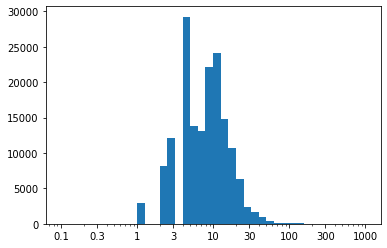

In [51]:
# Get the ticks for bins between [0 - max duration]
bins = 10 ** np.arange(-1, 3+0.1, 0.1)
# Generate the x-ticks want to apply
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
# Convert ticks into string values, to be displaye dlong the x-axis
labels = ['{}'.format(v) for v in ticks]
plt.hist(data=sub_duration, x='duration_min', bins=bins);
plt.xscale('log')
#Apply x-ticks
plt.xticks(ticks, labels);

#### Subscribers trips time is distributed from 1 to 1424, peak usage time is 10 min
#### Fluctuation in the the time distribution is clearly seen with log scale¶

### Analysis of start day and end day for customers

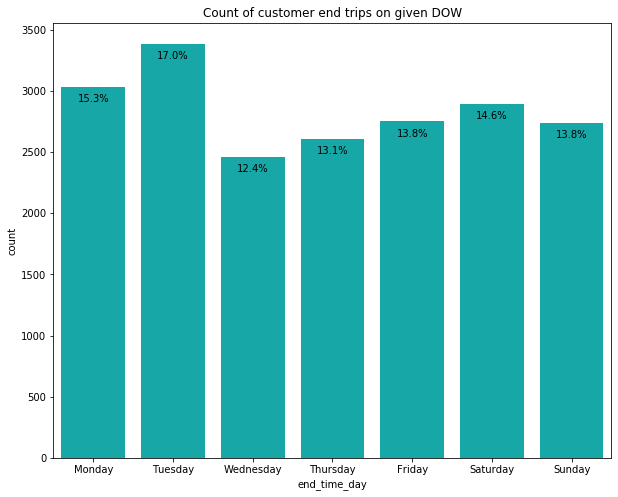

In [52]:
# Customers end trips
plt.figure(figsize=(10,8))
ax=sb.countplot(data = cust_duration ,x='end_time_day',color='c');
day_names = [calendar.day_name[i] for i in range(0,7)]
day_names = day_names
ax.xaxis.set_ticks(np.arange(7))
ax.set_xticklabels(day_names)
total = len(cust_duration['end_time_day'])

for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height/total)
    ax.annotate(percentage,  (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, -12), textcoords = 'offset points')
    plt.title('Count of customer end trips on given DOW')
plt.show()


#### Overall more customers are ending the trips on  weekends than start of the week

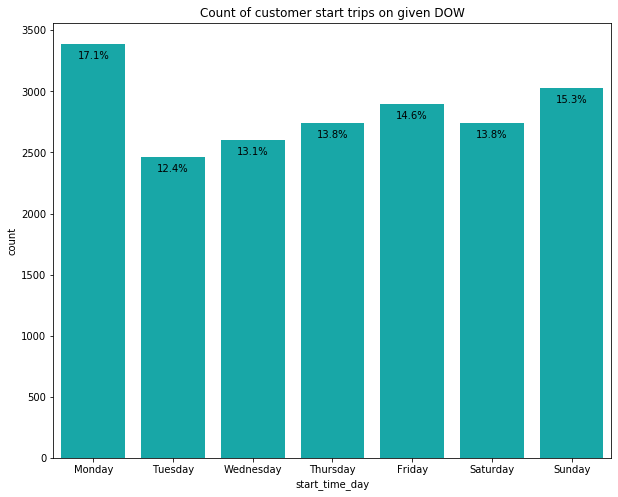

In [53]:
# Customers start trips

plt.figure(figsize=(10,8))
ax=sb.countplot(data = cust_duration ,x='start_time_day',color='c');
day_names = [calendar.day_name[i] for i in range(0,7)]
day_names = day_names
ax.xaxis.set_ticks(np.arange(7))
ax.set_xticklabels(day_names)
total = len(cust_duration['start_time_day'])

for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height/total)
    ax.annotate(percentage,  (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, -12), textcoords = 'offset points')
                    
    plt.title('Count of customer start trips on given DOW')
plt.show()


#### Overall more customers are starting the trips on  weekends than start of the week

### Analysis of start day and end day for subscribers

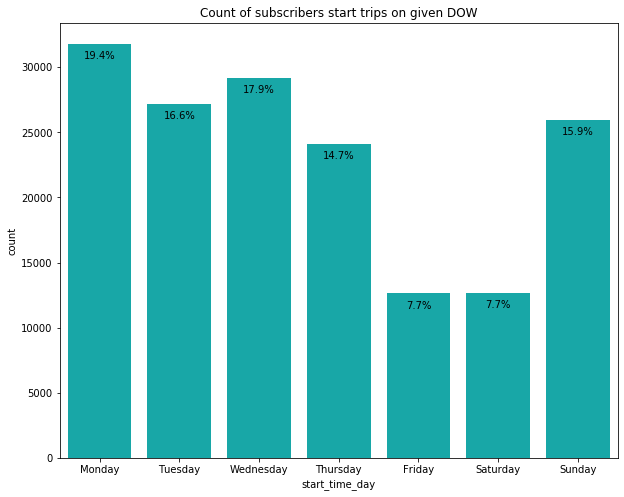

In [54]:
# Subscribers start trips

plt.figure(figsize=(10,8))
ax=sb.countplot(data = sub_duration ,x='start_time_day',color='c');
day_names = [calendar.day_name[i] for i in range(0,7)]
day_names = day_names
ax.xaxis.set_ticks(np.arange(7))
ax.set_xticklabels(day_names)
total = len(sub_duration['start_time_day'])

for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height/total)
    ax.annotate(percentage,  (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, -12), textcoords = 'offset points')
                    
    plt.title('Count of subscribers start trips on given DOW')
plt.show()

#### More subscribers are starting the trips on weekdays than weekends

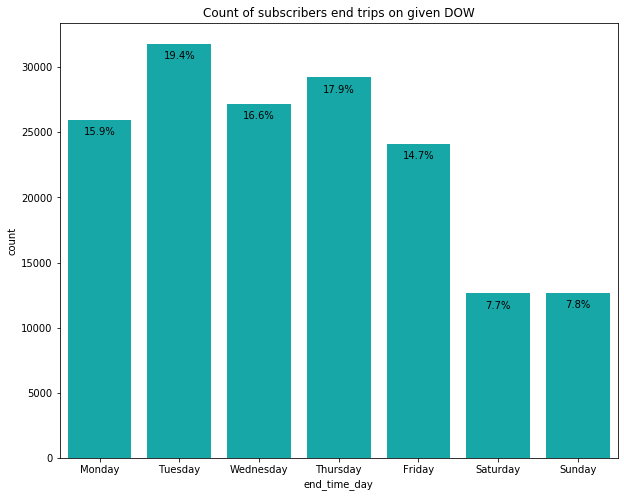

In [55]:
# Subscribers end trips

plt.figure(figsize=(10,8))
ax=sb.countplot(data = sub_duration ,x='end_time_day',color='c');
day_names = [calendar.day_name[i] for i in range(0,7)]
day_names = day_names
ax.xaxis.set_ticks(np.arange(7))
ax.set_xticklabels(day_names)
total = len(sub_duration['end_time_day'])

for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height/total)
    ax.annotate(percentage,  (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, -12), textcoords = 'offset points')
                    
    plt.title('Count of subscribers end trips on given DOW')
plt.show()

#### More subscribers are ending the trips on weekdays than weekends

### Distribution of  User ages

In [56]:
df_clean.member_birth_year.unique()

array([1984,    0, 1972, 1989, 1974, 1959, 1983, 1988, 1992, 1996, 1993,
       1990, 1981, 1975, 1978, 1991, 1997, 1986, 2000, 1982, 1995, 1980,
       1973, 1985, 1971, 1979, 1967, 1998, 1994, 1977, 1999, 1987, 1969,
       1963, 1976, 1964, 1965, 1961, 1968, 1966, 1962, 1954, 1958, 1960,
       1970, 1956, 1957, 1945, 1900, 1952, 1948, 1951, 1941, 1950, 1949,
       1953, 1955, 1946, 1947, 1931, 1943, 1942, 1920, 1933, 2001, 1878,
       1901, 1944, 1928, 1934, 1939, 1930, 1902, 1910, 1938, 1927])

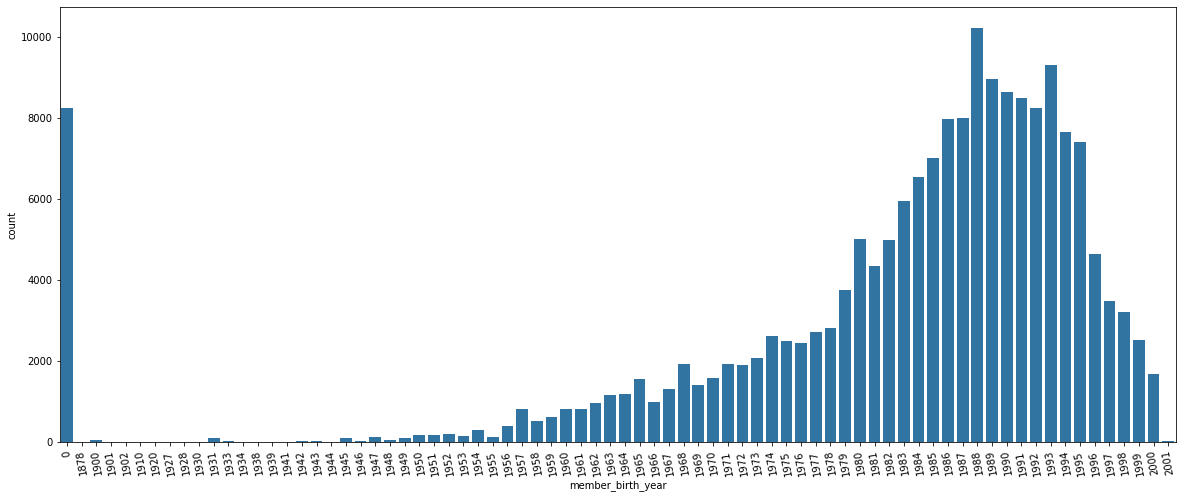

In [57]:
plt.figure(figsize=(20,8))
ax=sb.countplot(data = df_clean ,x='member_birth_year',color=base_color);
plt.xticks(rotation=100);

#### Millenial users (born in 1981-1996) have used the bike more

### Analyze number of trips on hour of the day

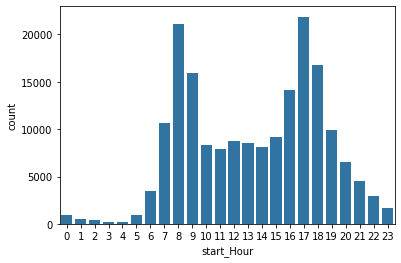

In [58]:
sb.countplot(data=df_clean, x='start_Hour',color=base_color)

#### Start time peaks around 8am and 5pm

### Geological Location of the stations

In [59]:
import geopandas as gpd
import descartes
from shapely.geometry import Point,Polygon

In [60]:
BBox = ((df_clean.start_station_longitude.min(),   df_clean.start_station_longitude.max(),      
         df_clean.start_station_latitude.min(), df_clean.start_station_latitude.max()))

(37.3172979, 37.88022244590679)

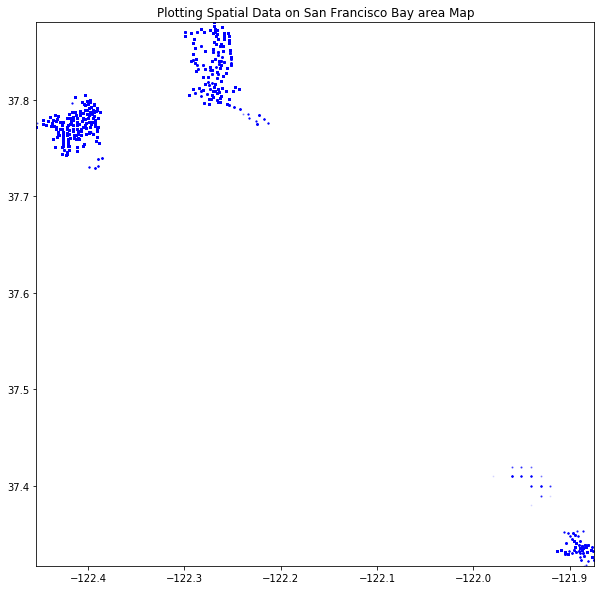

In [61]:
fig, ax = plt.subplots(figsize = (10,10))
ax.scatter(df_clean.start_station_longitude, df_clean.start_station_latitude, zorder=1, alpha= 0.1, c='b', s=1);
ax.set_title('Plotting Spatial Data on San Francisco Bay area Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])


#### More stations are located in NorthEast,North and South East of bay area 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

#### User types,Day of the week, Station location has caught my interest.  I used to transformation to see the duration distribution clearly as it was spread widely.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

#### start_time , end_time changed to be timestamp¶
#### member_birth_year converted to int instead of float
#### Removed nulls in member_birth_year,member_gender,end_station_id , end_station_name,start_station_id,start_station_name
#### Created copy of the data for customer and subscriber to analyse the user trends
#### Extracted the day of the week from end time and start time to create column dow to see the trend of renting on weekdays and weekends
#### Extracted start hour and end hour to see the trend of peak hours

## Bivariate Exploration



#### Distribution of Bike User and gender

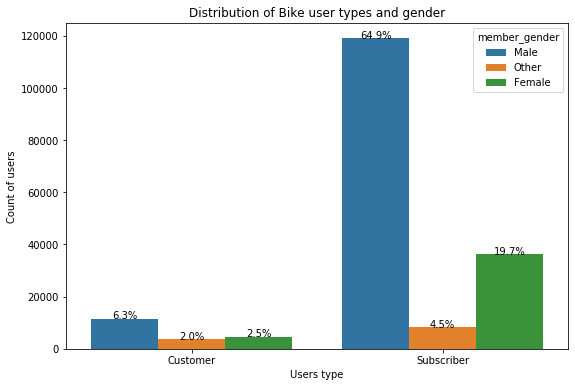

In [62]:
plt.figure(figsize=(9,6))
ax= sb.countplot(data = df_clean,x='user_type',hue='member_gender')
plt.title('Distribution of Bike user types and gender')
plt.xlabel('Users type')
plt.ylabel('Count of users')
total = len(df_clean['user_type'])
for p in ax.patches:
        height = p.get_height()
        percentage = '{:.1f}%'.format(100 * height/total)
        ax.text(p.get_x()+p.get_width()/2.,
            height + 4,percentage,ha='center')
        

plt.show()


#### Male are renting the bike most prominently than females. Subscribers are using the rental bikes than customers

### Distribution of gender against start trip day of the week for subscribers

In [63]:
day_order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
weekday_order = ['Mon','Tue','Wed','Thu','Fri']
weekend_order = ['Sat','Sun']


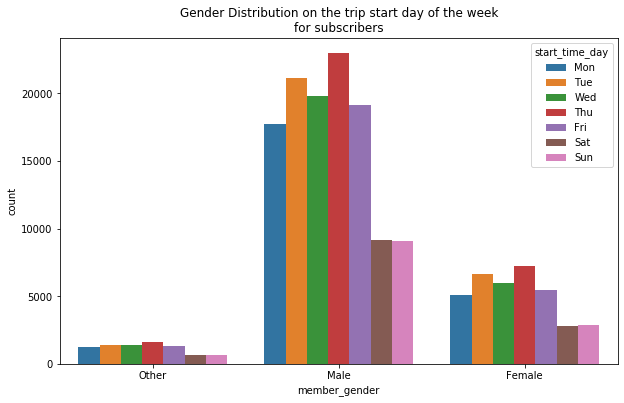

In [64]:
fig, ax = plt.subplots(figsize=(10, 6))
# Define x and y axes
ax.set(title = "Gender Distribution on the trip start day of the week\nfor subscribers",
       xlabel = "Gender",
       ylabel = "Count")
sb.countplot(data = sub_duration, x = 'member_gender', hue = 'start_time_day',hue_order = day_order);

#### Men and women subscribers used the bike more on Thursday. Overall more men used the bike than women and others


### Distribution of gender against start trip day of the week for customers

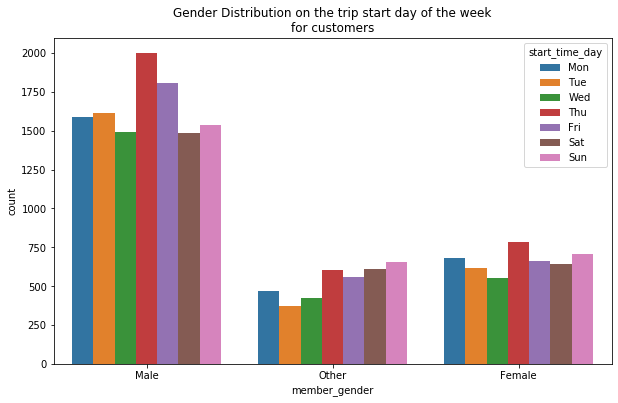

In [65]:
fig, ax = plt.subplots(figsize=(10, 6))
# Define x and y axes
ax.set(title = "Gender Distribution on the trip start day of the week\nfor customers",
       xlabel = "Gender",
       ylabel = "Count")

sb.countplot(data = cust_duration, x = 'member_gender', hue = 'start_time_day',hue_order = day_order);

#### There are more male customer using bikes than female and other customers.
#### More trips are taken on Thursday

### Number of weekday trips by hour by users

In [66]:
df_weekday = df_clean.loc[df_clean['start_time_day'].isin(['Mon','Tue','Wed','Thu','Fri'])]

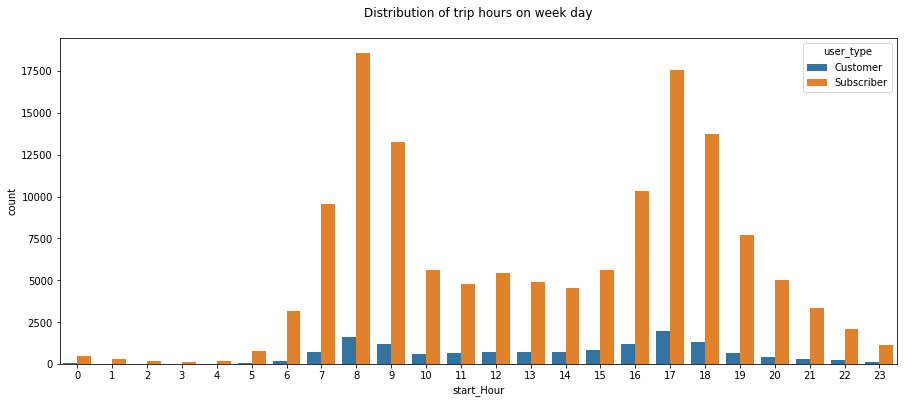

In [67]:
fig, ax = plt.subplots(figsize=(15, 6))
ax.set(title = "Distribution of trip hours on week day\n",
       xlabel = "start_hour",
       ylabel = "Count")
sb.countplot(data=df_weekday, x='start_Hour',hue='user_type');

#### More trips are taken on weekday at 8 am and 5 pm

### Number of weekend trips by hour by users

In [68]:
df_weekend = df_clean.loc[df_clean['start_time_day'].isin(['Sat','Sun'])]

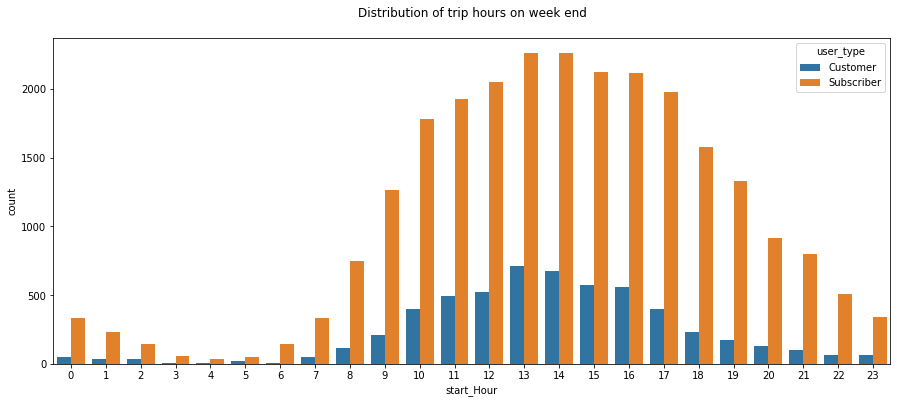

In [69]:
fig, ax = plt.subplots(figsize=(15, 6))
ax.set(title = "Distribution of trip hours on week end\n",
       xlabel = "start_hour",
       ylabel = "Count")
sb.countplot(data=df_weekend, x='start_Hour',hue='user_type');

#### Peak of the week end trips are in afternoon
#### Weekend rental is less than weekday rental
#### Though less but there is definite bike use during midnight hours on the weekends

### Analysis of relation between users and start day of the week

(-0.90040658720482, 6.90040658720482)

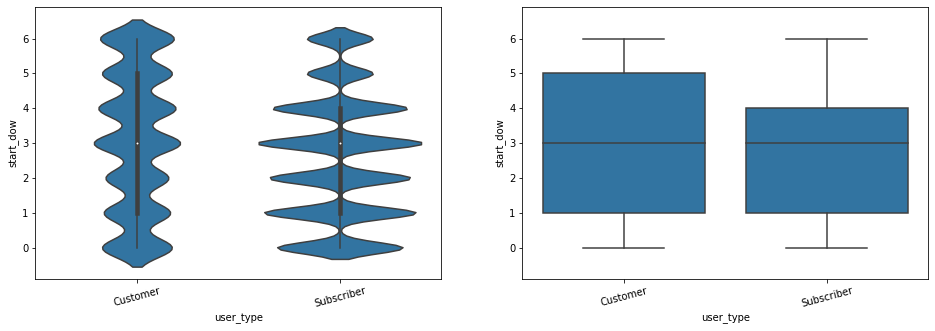

In [70]:
user_classes = ['Customer', 'Subscriber']

uclasses = pd.api.types.CategoricalDtype(ordered=True, categories=user_classes)

df_clean['user_type'] = df_clean['user_type'].astype(uclasses);
# Left plot: violin plot

plt.figure(figsize = [16, 5])
base_color = sb.color_palette()[0]
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data=df_clean, x='user_type', y='start_dow',color=base_color, innner='quartile');
plt.xticks(rotation=15);

# RIGHT plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data=df_clean, x='user_type', y='start_dow',color=base_color);
plt.xticks(rotation=15);
plt.ylim(ax1.get_ylim()) 

#### Median use of bikes is on day 3
#### There are less subsribers on day 5 and 6
#### Customers are using the bikes quite uniform over the week. More thick portion of the 
#### violin plot is on day 5 and 6.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

#### Its interesting to see the use of bikes by male and female users. Its also interesting to see renting varies by hour of the day on week day versus weekend. During weekday peak hours are at 8am and 12pm which says users use it for going to work and back to home. On Weekends peak hours are afternoon which suggests users are going out for lunch and then afternoon excursion. The bikes are more rented by customers on the weekend  compare to weekdays. 


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

#### No

## Multivariate Exploration

### Correlation Heat Map

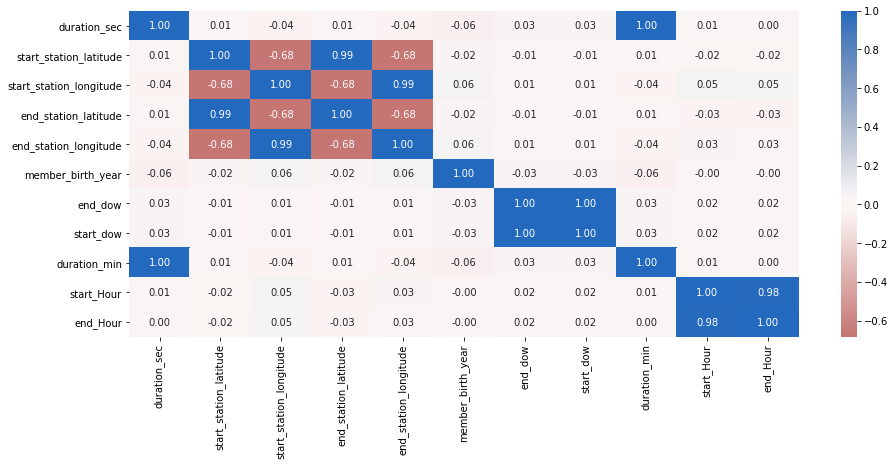

In [71]:
fig = plt.figure(figsize=(15, 6))
sb.heatmap(df_clean.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)

#### Above heatmap does not show much strong relation between features of interest

### Analyse Trip duration by day of week and hour

Text(0.5, 1, 'Mean Trip Duration by day of week and hour')

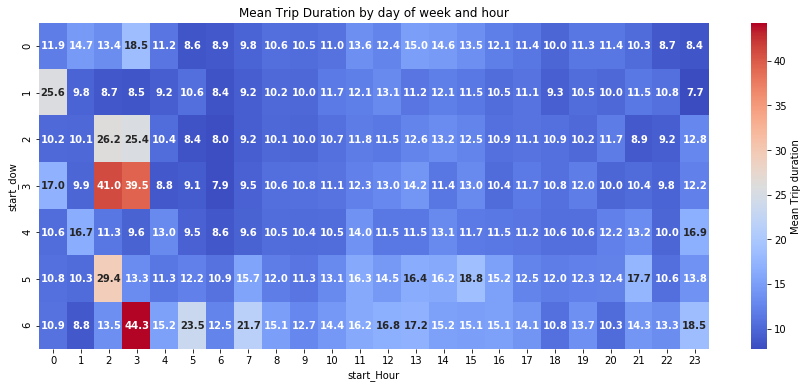

In [72]:
fig = plt.figure(figsize=(15, 6))
df_wide=df_clean.pivot_table( index='start_dow', columns='start_Hour', values='duration_min' )

sb.heatmap(df_wide, annot=True, annot_kws={"style": "normal", "weight": "bold"},cmap='coolwarm',fmt='.1f',
           cbar_kws ={'label':'Mean Trip duration'})
plt.title("Mean Trip Duration by day of week and hour")

#### There are some long trip usage in wee hours but not that too many. Saturday 3am has highest duration time of 44.3


### Analysis of distribution of users by day of the week and hour

In [73]:
dfgr2=df_clean.groupby(["start_dow",'start_Hour', 'user_type'],as_index=False)['duration_min'].count()

Text(0.5, 1, 'Trip Count distribution of users and subscribers by day of week and hour')

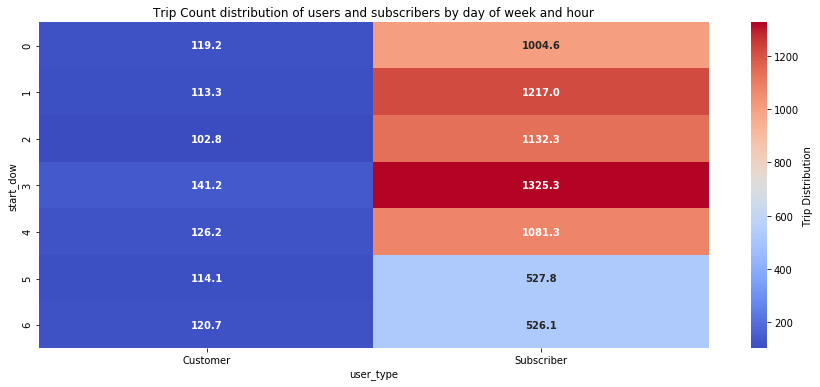

In [74]:
fig = plt.figure(figsize=(15, 6))
df_wide2=dfgr2.pivot_table( index='start_dow', columns='user_type', values='duration_min' )
sb.heatmap(df_wide2, annot=True, annot_kws={"style": "normal", "weight": "bold"},cmap='coolwarm',fmt='.1f',
           cbar_kws ={'label':'Trip Distribution'});
plt.title("Trip Count distribution of users and subscribers by day of week and hour")

#### Customer rental is peak on Sunday. Subscriber rental is more on weekdays with peak on Thursday .

### Analysis of weekday and weekend rental by longitude and latitudes

In [75]:
dfgr3=df_clean.groupby(["start_station_latitude","start_station_longitude","start_dow"],as_index=False)['duration_sec'].count()
dfgr4 = dfgr3.rename({'duration_sec':'DowCount'}, axis=1)

In [76]:
weekDayUsage =  dfgr4[dfgr4["start_dow"].isin([0, 1,2,3,4])]       
weekEndUsage =  dfgr4[dfgr4["start_dow"].isin([5,6])]                        

In [77]:
weekDayUsageSum = weekDayUsage.groupby(["start_station_latitude","start_station_longitude"],as_index=False)['DowCount'].sum()


In [78]:
weekEndUsageSum = weekEndUsage.groupby(["start_station_latitude","start_station_longitude"],as_index=False)['DowCount'].sum()

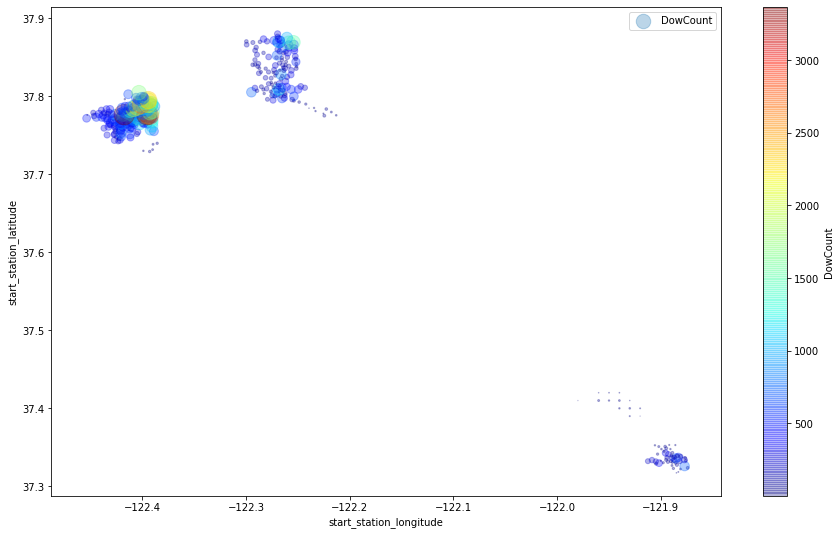

In [79]:
fig,ax = plt.subplots(figsize=(15,9))
weekDayUsageSum.plot(kind="scatter", x="start_station_longitude", y="start_station_latitude",
                    cmap=plt.get_cmap("jet"),label="DowCount",
                    c='DowCount',s=weekDayUsageSum['DowCount']/8,
                   colorbar=True, alpha=0.3, ax=ax)
weekdaycount = weekDayUsageSum["DowCount"]
tick_values = np.linspace(weekdaycount.min(), weekdaycount.max(), 11)

plt.legend()
plt.show()

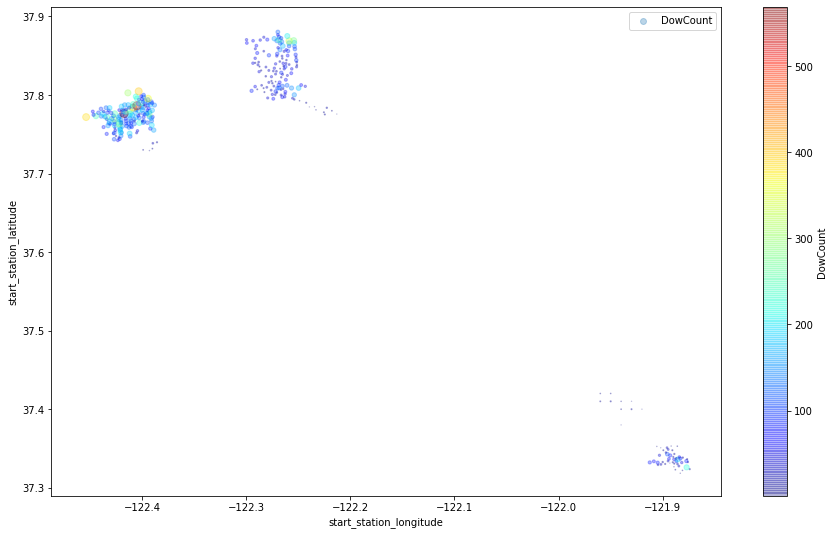

In [80]:
fig,ax = plt.subplots(figsize=(15,9))
weekEndUsageSum.plot(kind="scatter", x="start_station_longitude", y="start_station_latitude",
                    cmap=plt.get_cmap("jet"),label="DowCount",
                    c='DowCount',s=weekEndUsageSum['DowCount']/8,
                   colorbar=True, alpha=0.3, ax=ax)
weekendcount = weekEndUsageSum["DowCount"]
tick_values = np.linspace(weekendcount.min(), weekendcount.max(), 11)

plt.legend()
plt.show()

#### Weekday rental is higher in north than in south
#### Weekend rental is comparatively higher in north than south
#### Weekend rental is less than weekday rental . The bikes rented from the stations on weekend are quite spread compare to weekday stations. 

### Distribution of users over the geographical area

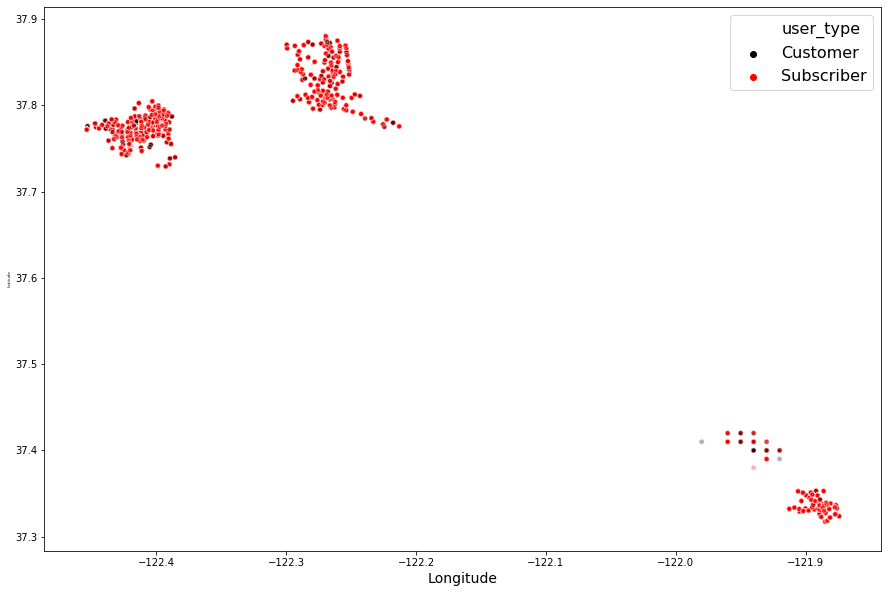

In [81]:
fig,ax=plt.subplots(figsize=(15,10))
import matplotlib.image as mpimg
ext=[-122.45370447635652, -121.8741186, 37.3172979, 37.88022244590679]
sb.scatterplot(data = df_clean, x="start_station_longitude", y="start_station_latitude",
               hue = df_clean['user_type'],
               palette=['black','red'],
               s=25 , alpha=0.3,zorder=1,
               ax=ax)
plt.ylabel('Latitude',fontsize=4)
plt.xlabel('Longitude',fontsize=14)
plt.legend(fontsize=16)
plt.show()
                

#### Subscribers are well spread over the bay area than customers

#### Subscribers are using the bikes at all the stations

### Analysis of day of the week ,duration and user type

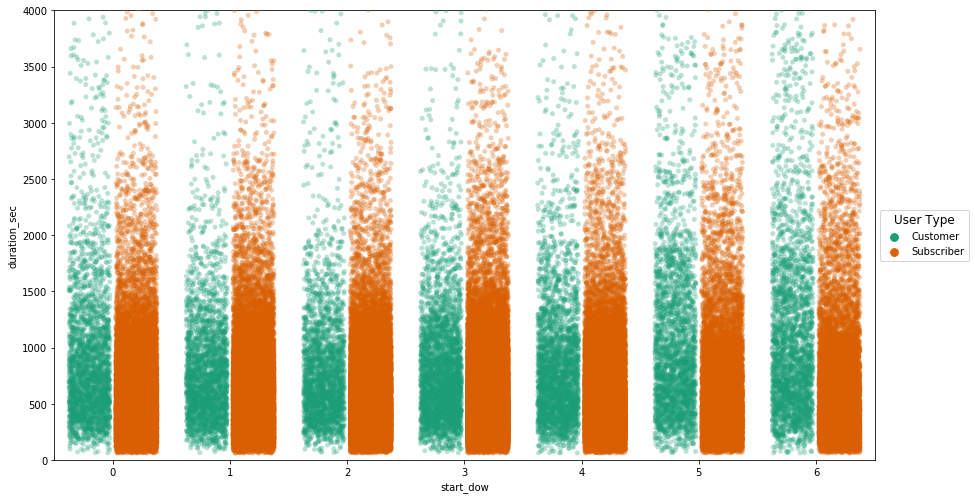

In [82]:
plt.figure(figsize=[14.70,8.27] )
sb.stripplot(data=df_clean,x='start_dow',y='duration_sec',hue='user_type',jitter=0.35,dodge=True,palette="Dark2",alpha=0.3)
plt.ylim(0,4000)
plt.legend(loc='center left',bbox_to_anchor=(1,0.5),title="User Type",title_fontsize=12)

#### This graph shows on more weekday use by subscribers and day 3 subscribers has peak.
#### On weekend customers have used bike more than on weekends

#### Analysis of day of the star ,duration and user type

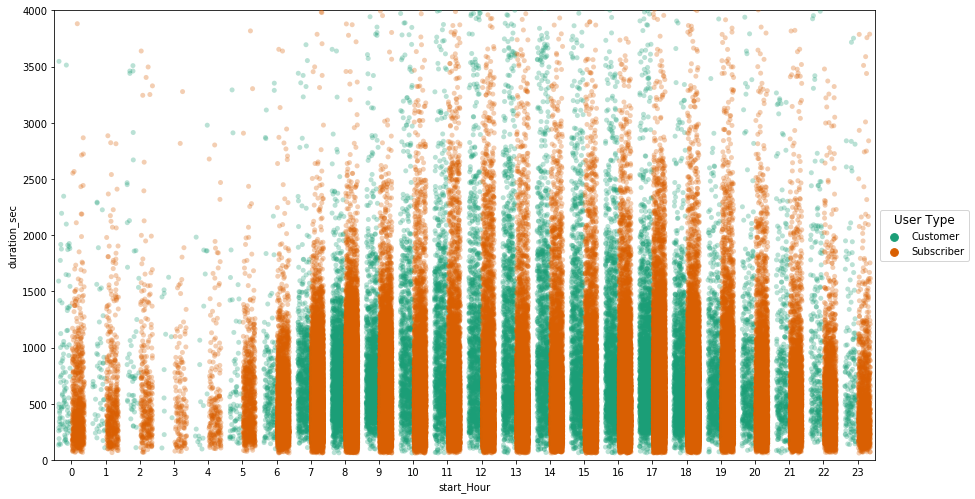

In [83]:
plt.figure(figsize=[14.70,8.27] )
sb.stripplot(data=df_clean,x='start_Hour',y='duration_sec',hue='user_type',jitter=0.35,dodge=True,palette="Dark2",alpha=0.3)
plt.ylim(0,4000)
plt.legend(loc='center left',bbox_to_anchor=(1,0.5),title="User Type",title_fontsize=12)

#### Its interesting to see the use of bikes at weehours by subscribers 

### Analyse the relation between user type,gender,start day and duration min

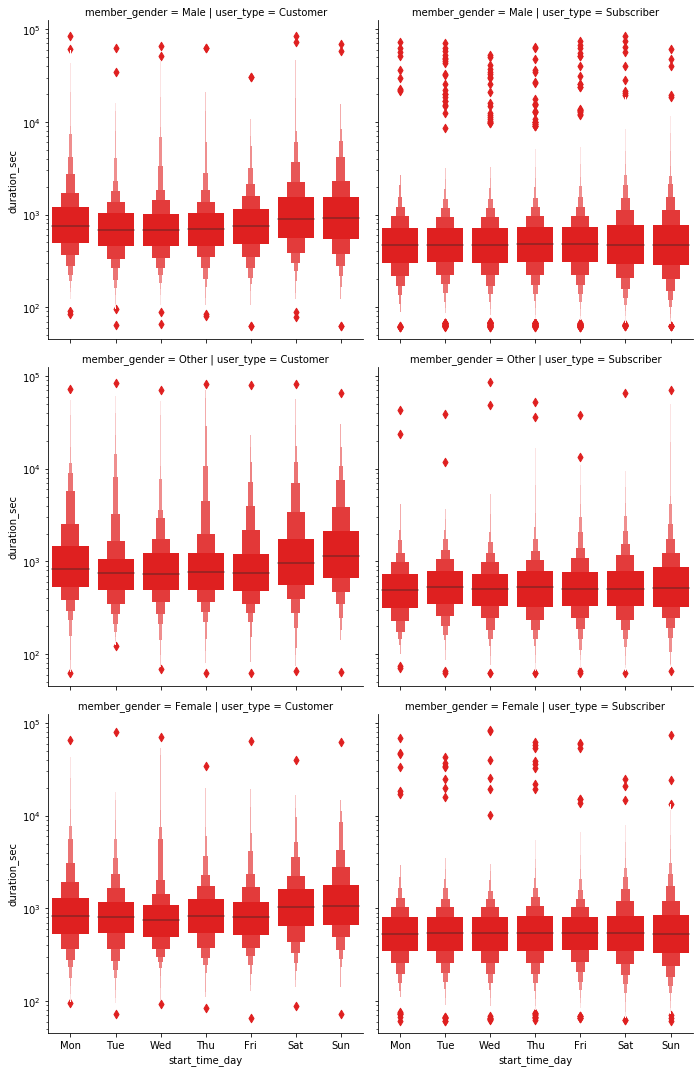

In [84]:
g = sb.catplot(data = df_clean, col = 'user_type', row = 'member_gender',x='start_time_day',y='duration_sec',
               height=5, kind="boxen",palette=["r"],order=day_order)
plt.yscale('log')            

#### Number of  male subscribers >  male customers
#### Male renters are taking trips for longer time than female and other renters.

### Analysis of users and gender for daily bike renting practice 

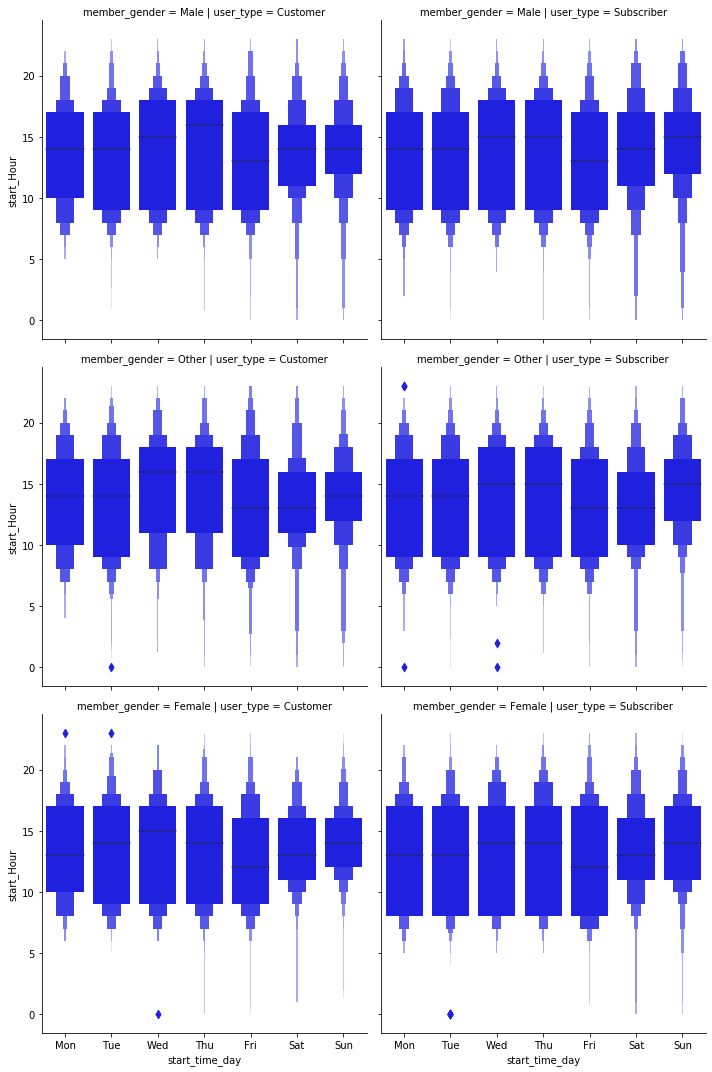

In [85]:
g = sb.catplot(data = df_clean, col = 'user_type', row = 'member_gender',x='start_time_day',y='start_Hour',
               height=5, kind="boxen",palette=["b"],order=day_order)
  

#### Its interesting to see that male are taking the bike trip in wee hours. Females customers are not riding bikes in weehours

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

#### The pattern of bike use by customers and subscribers has been strenghtened in multivariate analysis. This part of the analysis shows strong relation of subscribers with week day rental peaking 8am & 5pm and customer with weekend rental peaking afternoon.

### Were there any interesting or surprising interactions between features?


#### Its surprising to see why the wee hours usage.  There are some long trip usage in wee hours but not that too many. Saturday 3am has highest duration time of 44.3
#### Its interesting to see that male are taking the bike trip in wee hours. Females customers are not riding bikes in weehours¶